In [1]:
import os
import sys
import yaml
import argparse
from glob import glob
from datetime import datetime, timedelta

import numpy as np
import xarray as xr

import torch
from credit.boundary_padding import TensorPadding

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as patches
%matplotlib inline

sys.path.insert(0, os.path.realpath('../libs/'))
import graph_utils as gu
#import verif_utils as vu

In [2]:
import cmaps
# graph tools
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.colors as colors
import matplotlib.colorbar as cbar
import matplotlib.ticker as ticker
from matplotlib.ticker import ScalarFormatter
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

import cartopy.crs as ccrs
import cartopy.mpl.geoaxes
import cartopy.feature as cfeature

%matplotlib inline

In [3]:
scale_param = '50m'

PROVINCE = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale=scale_param,
    facecolor='none')

def map_gridline_opt(ax):
    '''
    Customize cartopy map gridlines
    '''
    # lat/lon gridlines and labeling

    GL = ax.gridlines(crs=ccrs.PlateCarree(), 
                      draw_labels=False, x_inline=False, y_inline=False, 
                      color='k', linewidth=0.1, linestyle=':', zorder=5)
    GL.top_labels = None; GL.bottom_labels = None
    GL.right_labels = None; GL.left_labels = None
    GL.xlabel_style = {'size': 14}; GL.ylabel_style = {'size': 14}
    GL.rotate_labels = False
    ax.add_feature(cfeature.BORDERS.with_scale(scale_param), linestyle='-', linewidth=2.5, zorder=7)
    ax.add_feature(PROVINCE, edgecolor='k', linestyle='-', linewidth=2.5, zorder=7)
    ax.add_feature(cfeature.COASTLINE.with_scale(scale_param ), edgecolor='k', linewidth=2.5, zorder=5)
    ax.spines['geo'].set_linewidth(2.5)
    return ax

In [4]:
# grid = {
#     'lon': np.arange(-125.65, -107.76, 0.04).astype(np.float32),
#     'lat': np.arange(29.88, 38.82, 0.04).astype(np.float32)
# }



In [5]:
fn_static = '/glade/campaign/collections/rda/data/d559000/INVARIANT/USGS404_geo_em_d01.nc'
ds_static = xr.open_dataset(fn_static)

XLAT = ds_static['XLAT_M'].values[0, ...]
XLONG = ds_static['XLONG_M'].values[0, ...]

In [6]:
# grid = {
#     'lon': np.arange(-128.45+1.4+0.4+20, -108+1.4+0.4+20, 0.04).astype(np.float32),
#     'lat': np.arange(30-0.12, 40.2-0.12, 0.04).astype(np.float32)
# }

In [7]:
# ds_ERA5 = xr.open_zarr('/glade/campaign/cisl/aiml/ksha/CREDIT_data/ERA5_plevel_base/static/ERA5_plevel_6h_static.zarr')
# lat_ERA5 = ds_ERA5['latitude'].values
# lon_ERA5 = ds_ERA5['longitude'].values
# lon_ERA5 = (lon_ERA5 + 180) % 360 - 180
# gridx, gridy = np.meshgrid(lon_ERA5, lat_ERA5)

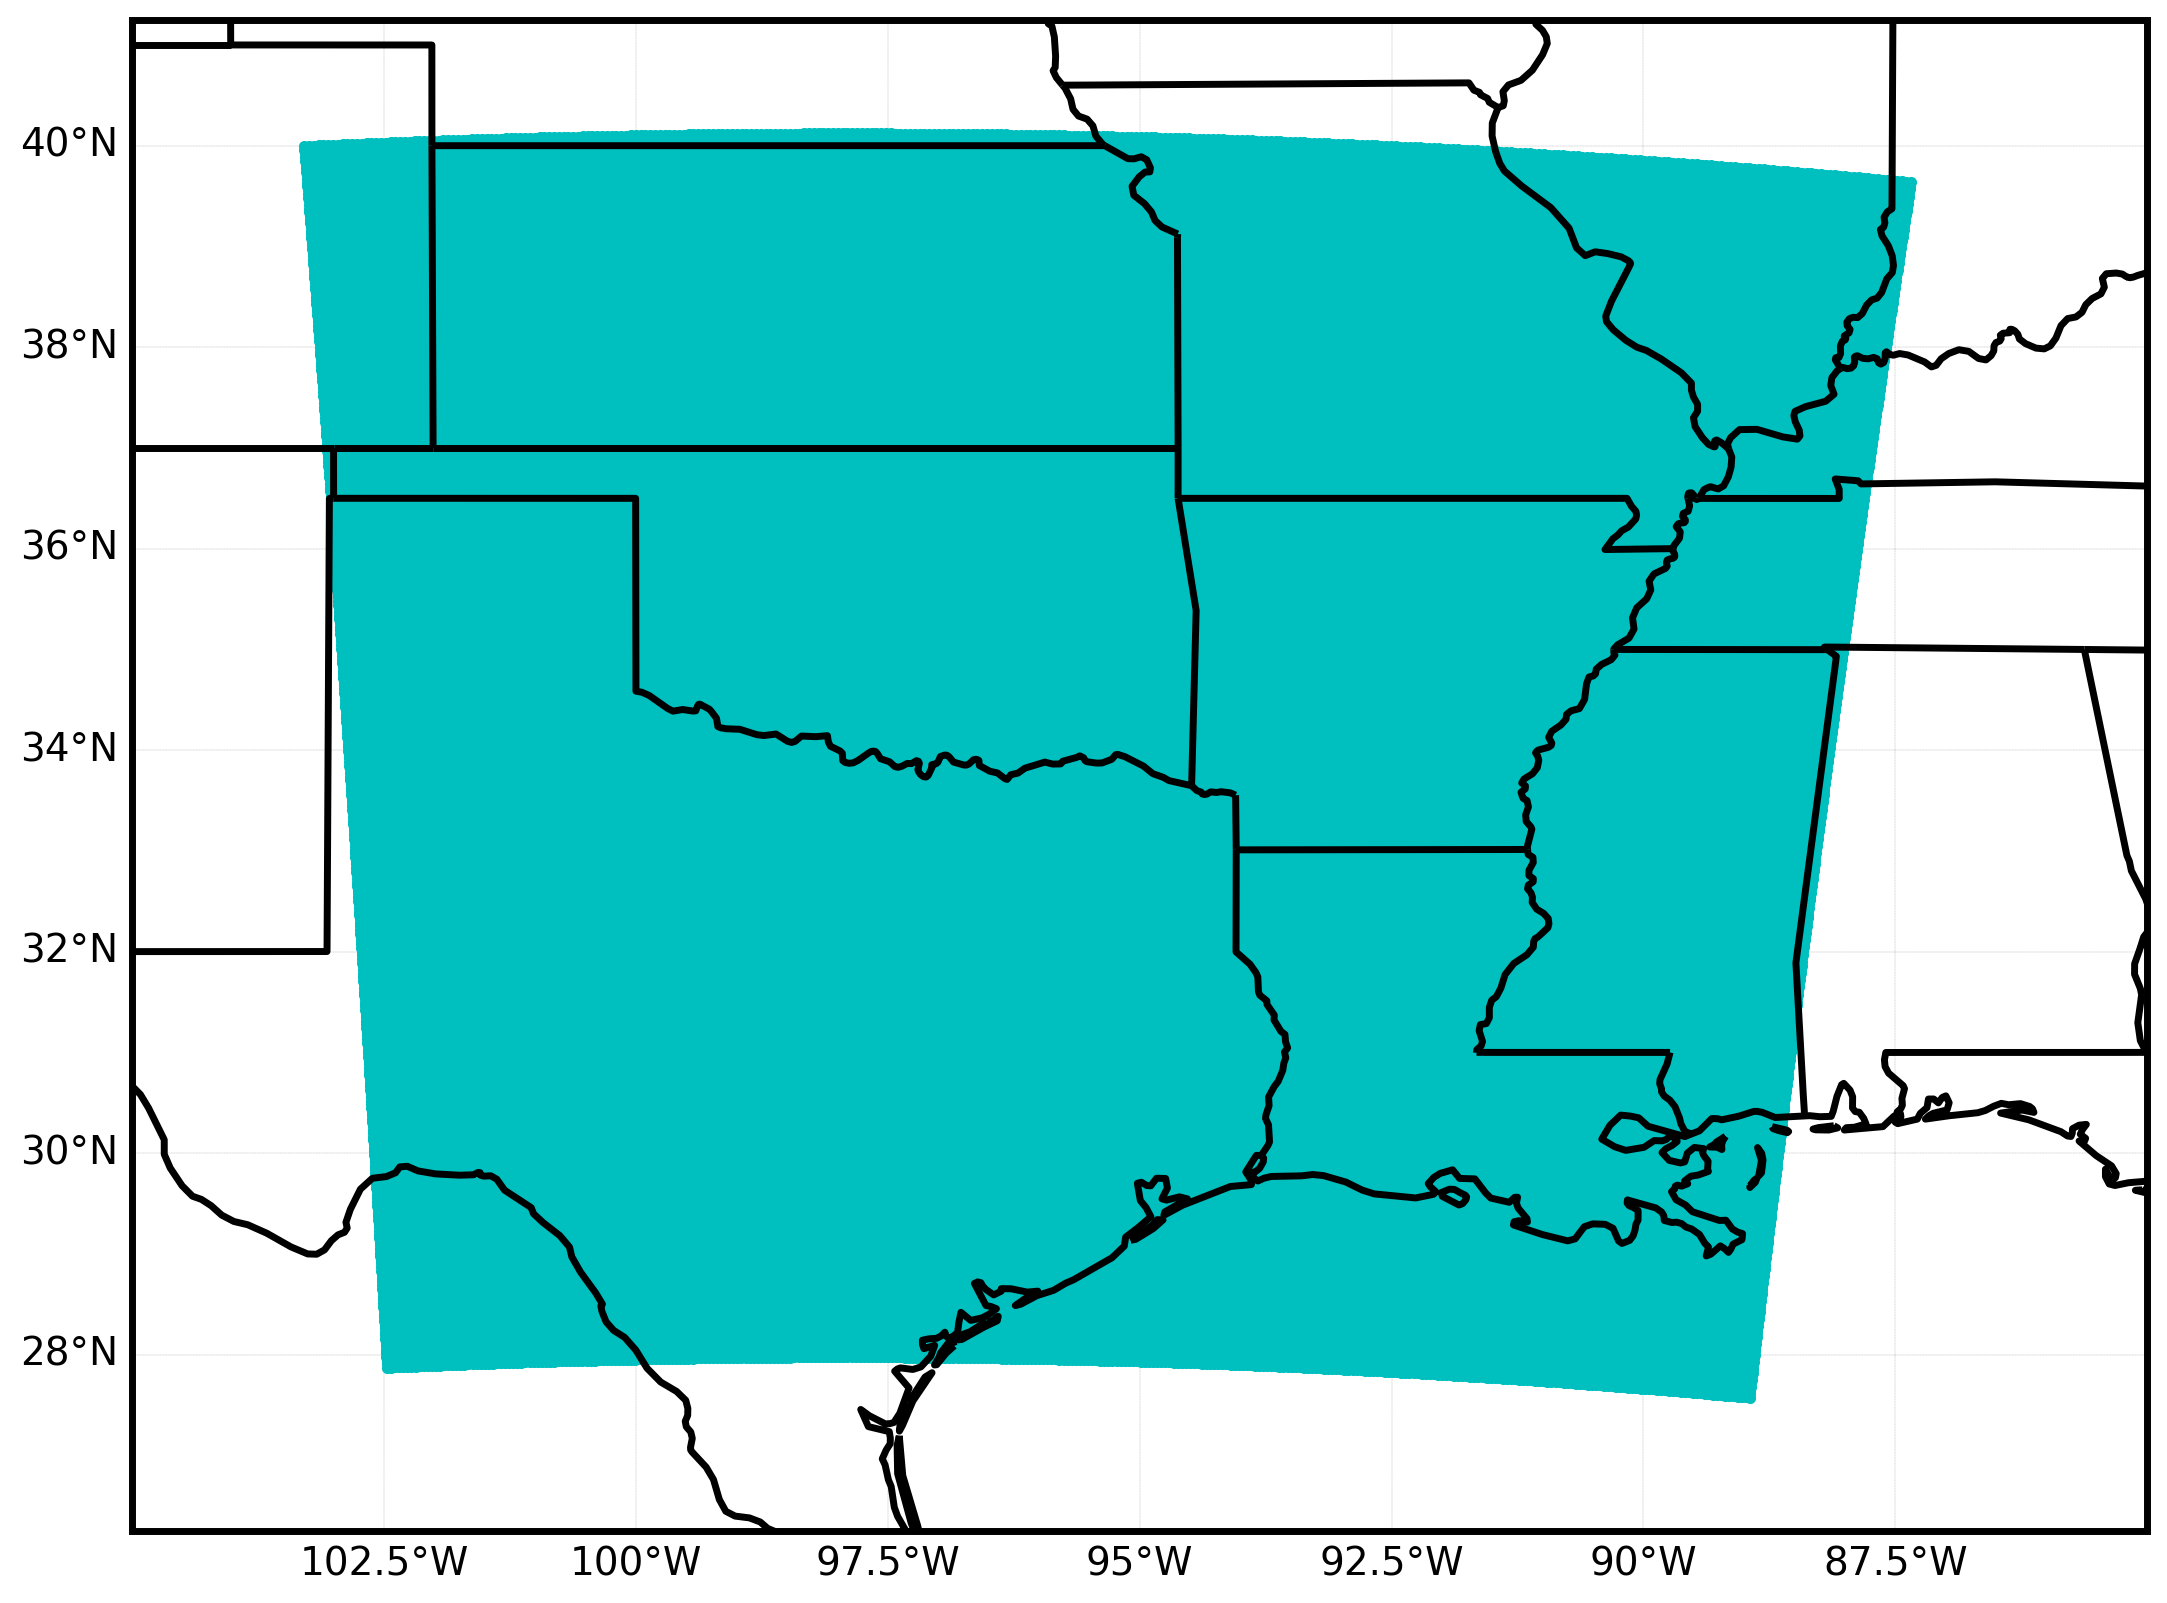

In [26]:
slice_lon1 = slice(570, 905+1, 1)
slice_lat1 = slice(200, 535+1, 1)

lon_grids1 = XLONG[slice_lat1, slice_lon1]
lat_grids1 = XLAT[slice_lat1, slice_lon1]

proj_ = ccrs.PlateCarree()
map_extent = [-105, -85, 26.25, 41.25]

fig = plt.figure(figsize=(13, 10), dpi=200)
ax = plt.axes(projection=proj_)
ax.set_extent(map_extent, crs=proj_)
ax = map_gridline_opt(ax)

GL = ax.gridlines(
    crs=ccrs.PlateCarree(), 
    draw_labels=True, x_inline=False, y_inline=False, 
    color='k', linewidth=0, linestyle=':', zorder=5
)

GL.top_labels = None
GL.right_labels = None
GL.xlabel_style = {'size': 14}; GL.ylabel_style = {'size': 14}

ax.plot(lon_grids1.ravel(), lat_grids1.ravel(), 'c.', transform=ccrs.PlateCarree())